In [17]:
from IPython.display import display
import ipywidgets as widgets

uploader = widgets.FileUpload(accept='.csv', multiple=False)
display(uploader)


FileUpload(value=(), accept='.csv', description='Upload')

In [18]:
import pandas as pd
import io

def read_uploaded_file(uploader):
    if uploader.value:
        # uploader.value is a tuple --> get the first item
        uploaded_file = uploader.value[0]  
        content = uploaded_file['content']
        df = pd.read_csv(io.BytesIO(content))
        return df
    else:
        print("No file uploaded yet!")

geyser_data = read_uploaded_file(uploader)


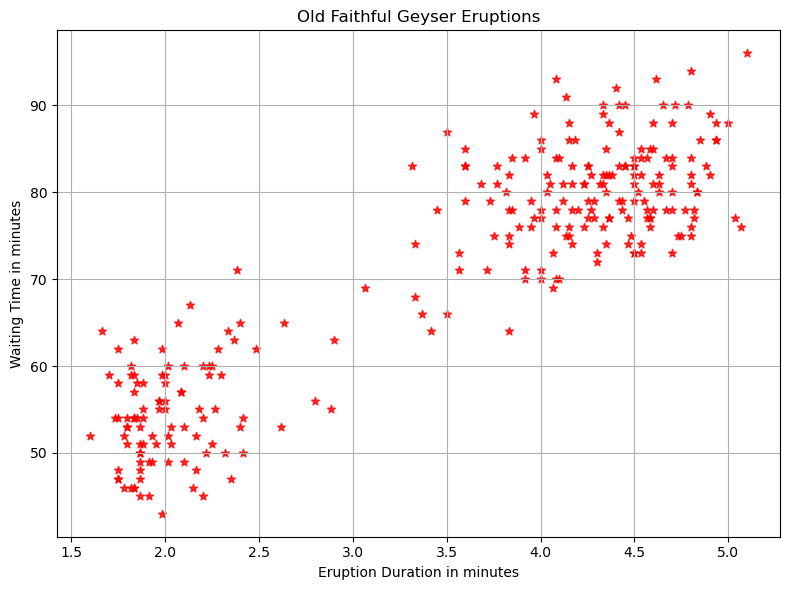

In [21]:
import matplotlib.pyplot as plt

if geyser_data is not None:
    plt.figure(figsize=(8, 6))
    plt.scatter(geyser_data['eruptions'], geyser_data['waiting'], color='red', marker='*', alpha=0.8)
    plt.title('Old Faithful Geyser Eruptions')
    plt.xlabel('Eruption Duration in minutes')
    plt.ylabel('Waiting Time in minutes')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [32]:
# Upload Button
from IPython.display import display
import ipywidgets as widgets
import pandas as pd
import numpy as np
import io

# Create an upload button
upload_btn = widgets.FileUpload(accept='.csv', multiple=False)
display(upload_btn)


FileUpload(value=(), accept='.csv', description='Upload')

In [33]:
# Correct Read Function
def read_uploaded_file(uploader):
    if uploader.value:
        uploaded_file = uploader.value[0]
        content = uploaded_file['content']
        df = pd.read_csv(io.BytesIO(content))
        return df
    else:
        print("No file uploaded yet!")

# Load the data
data = read_uploaded_file(upload_btn)
X = data[['eruptions', 'waiting']].values


In [34]:
# K-Means Setup
k = 2
max_iters = 100
tolerance = 1e-4

np.random.seed(42)
initial_centroids = X[np.random.choice(X.shape[0], k, replace=False)]
centroids = initial_centroids.copy()

# K-Means Algorithm
for iteration in range(max_iters):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    cluster_labels = np.argmin(distances, axis=1)
    new_centroids = np.array([X[cluster_labels == i].mean(axis=0) for i in range(k)])
    if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tolerance):
        break
    centroids = new_centroids

# Relabel clusters (1 and 2 based on eruption time)
cluster_summary = [(i, centroids[i][0]) for i in range(k)]
cluster_summary.sort(key=lambda x: x[1])
cluster_map = {cluster_summary[0][0]: 1, cluster_summary[1][0]: 2}
renumbered_labels = np.vectorize(cluster_map.get)(cluster_labels)

# Add cluster label to data
data['cluster'] = renumbered_labels

print(f"\n✅ K-Means converged in {iteration + 1} iterations.\n")



✅ K-Means converged in 4 iterations.



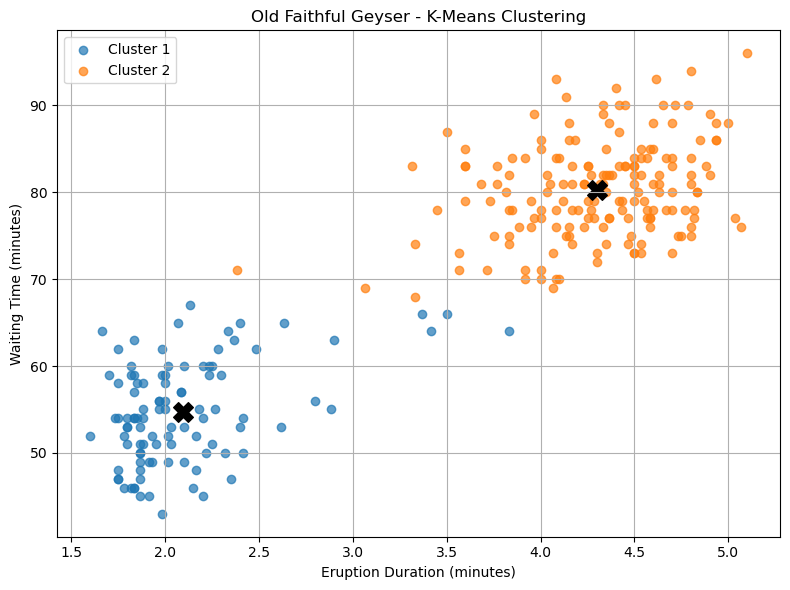

In [35]:
import matplotlib.pyplot as plt

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster separately
for cluster_num in [1, 2]:
    cluster_data = data[data['cluster'] == cluster_num]
    plt.scatter(cluster_data['eruptions'], cluster_data['waiting'], label=f'Cluster {cluster_num}', alpha=0.7)

# Plot Centroids
for idx, center in enumerate(centroids):
    plt.scatter(center[0], center[1], s=200, c='black', marker='X')  # Big black X for centroid

# Labels and Title
plt.title('Old Faithful Geyser - K-Means Clustering')
plt.xlabel('Eruption Duration (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin
import io


In [38]:
# Create Upload Button
from IPython.display import display
import ipywidgets as widgets

upload_btn = widgets.FileUpload(accept='.csv', multiple=False)
display(upload_btn)


FileUpload(value=(), accept='.csv', description='Upload')

In [39]:
# Function to read uploaded file
def read_uploaded_file(uploader):
    if uploader.value:
        uploaded_file = uploader.value[0]
        content = uploaded_file['content']
        df = pd.read_csv(io.BytesIO(content))
        return df
    else:
        print("No file uploaded yet!")

# Load Data
data = read_uploaded_file(upload_btn)
X = data[['eruptions', 'waiting']].values


In [40]:
def k_means_numpy(X, k, max_iters=100, seed=42):
    np.random.seed(seed)
    centers = X[np.random.choice(len(X), k, replace=False)]
    objective_values = []

    for _ in range(max_iters):
        labels = pairwise_distances_argmin(X, centers)
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        distances = np.sum((X - centers[labels])**2, axis=1)
        objective = np.sum(distances)
        objective_values.append(objective)

        if np.allclose(centers, new_centers):
            break
        centers = new_centers

    return centers, labels, objective_values


In [41]:
k = 2  # Number of clusters
centers, labels, objective_values = k_means_numpy(X, k)

print(f"K-Means converged in {len(objective_values)} iterations.")
print(f"Final Objective Function Value: {objective_values[-1]:.2f}")


K-Means converged in 4 iterations.
Final Objective Function Value: 8901.77


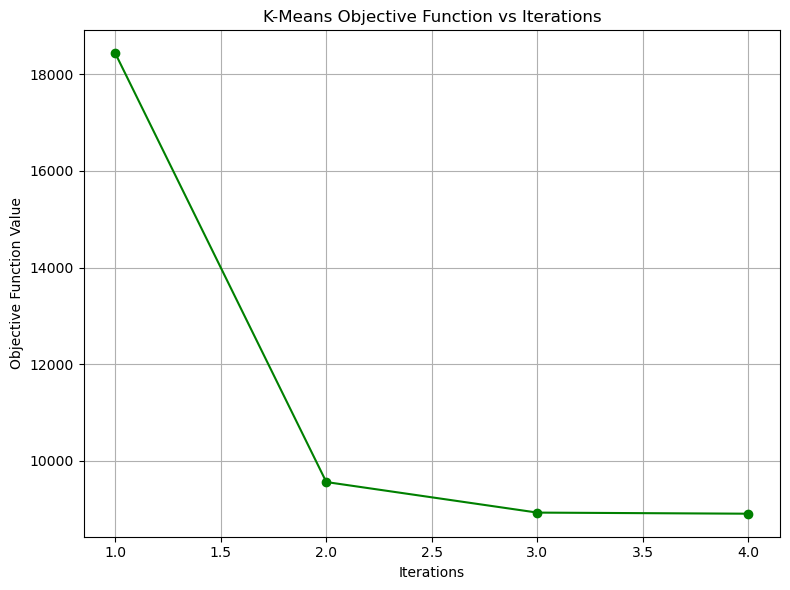

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(objective_values) + 1), objective_values, color='green', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('K-Means Objective Function vs Iterations')
plt.grid(True)
plt.tight_layout()
plt.show()
